<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/Taller_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Agrupando Países por su Desarrollo Económico**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- ## Yuli Fernanda Esquivel
- ## Maria Jose Gonzalez
- ## Manuel Alarcón Morales

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Clustering_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 14 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Caso de Estudio: Consultoría para el PNUD**

**Contexto:** El Programa de las Naciones Unidas para el Desarrollo (PNUD) busca optimizar la asignación de recursos y la creación de políticas públicas. En lugar de aplicar
una única estrategia para todos, quieren entender si existen grupos de países con perfiles de desarrollo similares para crear programas de ayuda más efectivos.

**Tu Misión:** Como economista y científico de datos, tu equipo ha sido contratado para analizar un conjunto de datos con indicadores socio-económicos y de salud. Deberás aplicar técnicas de clustering para identificar estos grupos y presentar un perfil detallado de cada uno, junto con una recomendación de política.

## Ejercicio 1: Configuración inicial

1. Importa todas las librerías necesarias

In [37]:
### TU CÓDIGO AQUÍ ###
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [38]:
# Configuraciones de visualización
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Ejercicio 2: Carga y Exploración de Datos

1. Carga el dataset 'Country-data.csv'.

In [39]:
### TU CÓDIGO AQUÍ ###
from google.colab import drive, files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
path='/content/drive/MyDrive'
os.chdir(path)
country = pd.read_csv('Country-data.csv')


2. Muestra las 5 primeras filas

In [41]:
print("Primeras filas:")
### TU CÓDIGO AQUÍ ###
country.head()

Primeras filas:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


3. Obtén información general del dataset como tipos de datos, número de filas y columnas, cantidad de valores faltantes

In [42]:
print("\nInformación del DataFrame:")
### TU CÓDIGO AQUÍ ###
country.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


4. Obtén las estadísticas descriptivas de las variables del dataset

In [43]:
print("\nEstadísticas Descriptivas:")
### TU CÓDIGO AQUÍ ###
country.describe()


Estadísticas Descriptivas:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,"17,144.69",7.78,70.56,2.95,"12,964.16"
std,40.33,27.41,2.75,24.21,"19,278.07",10.57,8.89,1.51,"18,328.70"
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,"3,355.00",1.81,65.30,1.79,"1,330.00"
50%,19.30,35.00,6.32,43.30,"9,960.00",5.39,73.10,2.41,"4,660.00"
75%,62.10,51.35,8.60,58.75,"22,800.00",10.75,76.80,3.88,"14,050.00"
max,208.00,200.00,17.90,174.00,"125,000.00",104.00,82.80,7.49,"105,000.00"


5. ¿Hay valores nulos?
RTA: no hay valores nulos, el dataset está limpio


6. ¿Las escalas de las variables son muy diferentes?

>RTA: Dado que  la salud, las exportaciones y las importaciones están expresadas como proporción del PIB del pais, la tasa de mortaldiad infantil está expresada por cada mil nacimientos dada la defunción de menores de 5 años, se puede notar que hay una gran diferencia entre las escalas entre las escalas de las varaibles. A forma de explicación, notese que la inflación la fertilidad y la mortalidad infantil están dadas como tasas, y no alcanzan los valores expresados numericamente del ingreso  las exportaciones, importaciones o gasto en salud.



7. ¿Qué implicaciones tiene esto para el análisis de clustering?
> implica que se necesita una estandarización de las variables para que el modelo interprete adecuadamente la dsitancia entre los datos

8. Redacta un análisis de las estadísticas descriptivas

>respecto a la mortalidad infantil, se puede deducir la presencia de una asimetría positiva porque la mediana(19.30) es menor a la media(38.27) y el dato máximo está alejado de estos valores (208.00), además la dispersión de la media parece ser alta, algo que tiene sentido dado de hay datos de 167 paises.

> Por el lado de exportaciones e importaciones, se ve reflejado que parece haber simetría, dado que la media y la mediana no están alejadas la una de la otra para ambas variables, en suma, al igual que la mortalidad infantil, se evidencia por un lado un valor maximo relativamente más grande, y por otro una desviación de la media grande, indicio de que los paises son muy diferentes en la proporción de su PIB que ocupan las exportaciones e importaciones y no solo eso, si no que hay paises que dentro de la muestra tienen un comportamiento atípico con niveles muy por encima del valor de su media.

> dentro del gasto en salud, expectativa de vida y fertilidad se evidencia una desviación estandar baja, y como la media no está alejada de la mediana, entonces se puede inferir que los datos se aproximan a tener una distribución normal para las 3 varaibles.

>En la inflación, ingreso y PIB Per Cápita podemos observa un comportamineto semejante, ya que presentan una asimetria negativa, porque la mediana es menor a la media notoriamente menor, además hay presencia de datos atipícos entre la media y el valor maximo, visible en que el valor maximo es mucho mayor que la media y la mediana

## Ejercicio 3: Preprocesamiento de Datos

1. Selecciona solo las variables numéricas para el clustering

In [44]:
### TU CÓDIGO AQUÍ ###
variables_numericas = country.select_dtypes(include=[np.number])

2. Estandariza las variables usando StandardScaler

In [45]:
### TU CÓDIGO AQUÍ ###
scaler = StandardScaler()
country_escalado = scaler.fit_transform(variables_numericas)


In [46]:
country_escalado_df = pd.DataFrame(country_escalado, columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
country_escalado_df


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.29,-1.14,0.28,-0.08,-0.81,0.16,-1.62,1.90,-0.68
1,-0.54,-0.48,-0.10,0.07,-0.38,-0.31,0.65,-0.86,-0.49
2,-0.27,-0.10,-0.97,-0.64,-0.22,0.79,0.67,-0.04,-0.47
3,2.01,0.78,-1.45,-0.17,-0.59,1.39,-1.18,2.13,-0.52
4,-0.70,0.16,-0.29,0.50,0.10,-0.60,0.70,-0.54,-0.04
...,...,...,...,...,...,...,...,...,...
162,-0.23,0.20,-0.57,0.24,-0.74,-0.49,-0.85,0.37,-0.55
163,-0.53,-0.46,-0.70,-1.21,-0.03,3.62,0.55,-0.32,0.03
164,-0.37,1.13,0.01,1.38,-0.66,0.41,0.29,-0.66,-0.64
165,0.45,-0.41,-0.60,-0.52,-0.66,1.50,-0.34,1.14,-0.64


## Ejercicio 4: K-Means Clustering

Usa K-Means para encontrar los clusters. Primero, debes decidir el número óptimo de clusters (k).

1. Usa el Método del Codo para encontrar el k óptimo.
Prueba un rango de k de 1 a 10. Grafica.

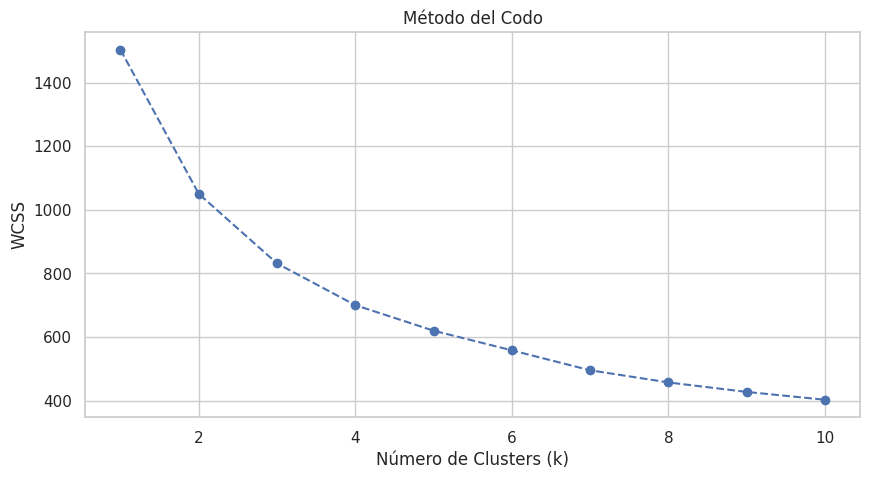

In [47]:
### TU CÓDIGO AQUÍ ###
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(country_escalado_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.show()

2. ¿Dónde está el "codo"? ¿Qué número de clusters (k) parece ser el más adecuado? Justifiquen su elección.

>RTA:no se distingue facilmente dado que la curva es bastante suave y decrece sin saltos bruscos, luego no es posible determinar con factibilidad cual sería un número de clusters adecuado.

3. Calcula y grafica el coeficiente de silueta

Para n_clusters = 2, el coeficiente de silueta promedio es: 0.2874
Para n_clusters = 3, el coeficiente de silueta promedio es: 0.2833
Para n_clusters = 4, el coeficiente de silueta promedio es: 0.2960
Para n_clusters = 5, el coeficiente de silueta promedio es: 0.2993
Para n_clusters = 6, el coeficiente de silueta promedio es: 0.2287
Para n_clusters = 7, el coeficiente de silueta promedio es: 0.2477
Para n_clusters = 8, el coeficiente de silueta promedio es: 0.2388
Para n_clusters = 9, el coeficiente de silueta promedio es: 0.2073
Para n_clusters = 10, el coeficiente de silueta promedio es: 0.2022


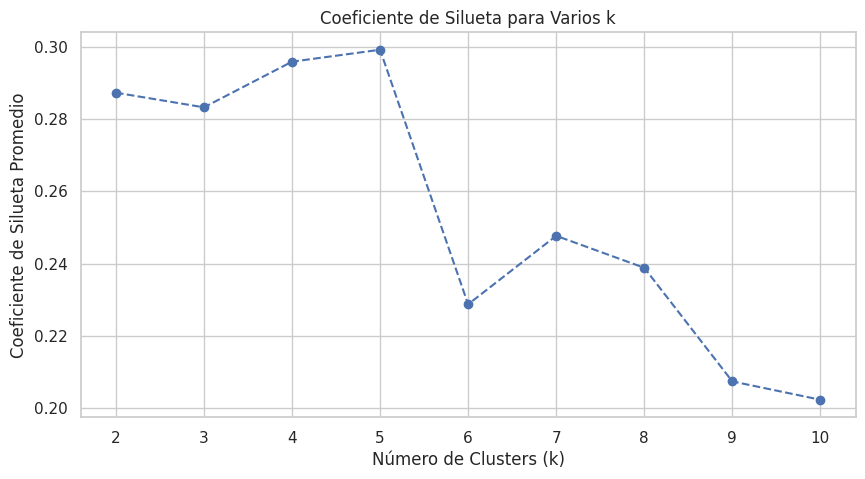

In [48]:
range_n_clusters = range(2, 11)

silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(country_escalado_df)
    silhouette_avg = silhouette_score(country_escalado_df, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es: {silhouette_avg:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', linestyle='--')
plt.title('Coeficiente de Silueta para Varios k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.show()

4. ¿Qué número de clusters (k) parece ser el más adecuado según el coeficiente de silueta? Justifiquen su elección.
>El número de clusters más adecuado parace ser el 5 dado que el coeficiente de silueta promedio para 5 clusters es el más alto al compararlo con tener un rango de 1 a 10 clusters, de forma que la mejor distribución de los datos es con 5 k's.


5. Basados en los resultados del método del codo y el coeficiente de silueta, tomen una decisión de cuántos clusters usar. Justifiquen su elección.
>Se eligirá como número de clústers al 5, ya que al menos con la información del coeficeinte de silueta hay algo más de confianza respecto a la distancia entre los datos para ubicarlos en clusters. el método del codo no proporciona una clara evidencia.


6. Aplica K-Means con el k que tu grupo eligió.

In [49]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(country_escalado_df)
clusters_kmeans

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 4, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 3, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

7. Añade la asignación de clusters al DataFrame original

In [50]:
# Añadir los clusters al DataFrame original
country_escalado_df['Cluster_KMeans'] = clusters_kmeans
country_escalado_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
0,1.29,-1.14,0.28,-0.08,-0.81,0.16,-1.62,1.90,-0.68,1
1,-0.54,-0.48,-0.10,0.07,-0.38,-0.31,0.65,-0.86,-0.49,0
2,-0.27,-0.10,-0.97,-0.64,-0.22,0.79,0.67,-0.04,-0.47,0
3,2.01,0.78,-1.45,-0.17,-0.59,1.39,-1.18,2.13,-0.52,1
4,-0.70,0.16,-0.29,0.50,0.10,-0.60,0.70,-0.54,-0.04,0
...,...,...,...,...,...,...,...,...,...,...
162,-0.23,0.20,-0.57,0.24,-0.74,-0.49,-0.85,0.37,-0.55,0
163,-0.53,-0.46,-0.70,-1.21,-0.03,3.62,0.55,-0.32,0.03,0
164,-0.37,1.13,0.01,1.38,-0.66,0.41,0.29,-0.66,-0.64,0
165,0.45,-0.41,-0.60,-0.52,-0.66,1.50,-0.34,1.14,-0.64,1


## Ejercicio 5: Análisis e Interpretación de los Clusters

Ahora que tienes los grupos, necesitas entender qué los caracteriza.

1. Calcula el promedio de cada variable para cada cluster.
Esto te dará el "perfil" de cada grupo.

In [51]:
promedios_por_cluster = country_escalado_df.groupby('Cluster_KMeans').mean()
promedios_por_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_KMeans,,,,,,,,,
0,-0.41,-0.00,-0.24,0.03,-0.23,-0.02,0.28,-0.44,-0.35
1,1.31,-0.42,-0.13,-0.13,-0.69,0.21,-1.28,1.34,-0.61
2,-0.85,4.94,-0.01,4.55,2.44,-0.50,1.23,-1.04,2.44
3,-0.82,0.18,0.83,-0.26,1.40,-0.50,1.07,-0.77,1.60
4,2.28,-0.58,-0.64,-1.22,-0.62,9.13,-1.13,1.92,-0.58


2. Visualiza los resultados. Un scatter plot de 'gdpp' vs 'child_mort' es un buen punto de partida.

ValueError: Unrecognized marker style 'variables_numericas'

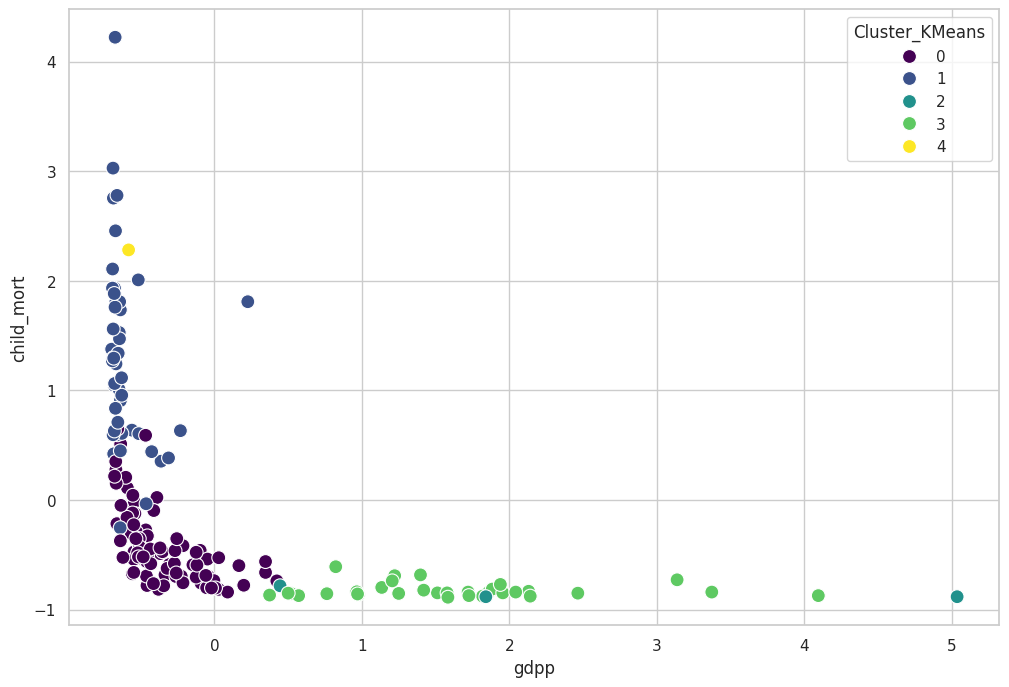

In [52]:

plt.figure(figsize=(12, 8))

sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_KMeans', data=country_escalado_df, palette='viridis', s=100)


centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 8], centroids[:, 0], s=300, c='red', marker='variables_numericas', label='Centroides')

# Use correct labels for the country data
plt.title('Segmentación de Países con K-Means: PIB per Cápita vs Mortalidad Infantil')
plt.xlabel('PIB per Cápita (gdpp)')
plt.ylabel('Mortalidad Infantil (child_mort)')
plt.legend()
plt.show()

In [56]:
#filtrado para ver qué hay en los clusters pequeños
cluster_2_data = country_escalado_df[country_escalado_df['Cluster_KMeans'] == 2]
display(cluster_2_data)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
91,-0.88,4.90,0.35,3.94,3.88,-0.39,1.21,-0.87,5.04,2
98,-0.78,4.09,0.67,4.44,0.58,-0.37,1.10,-1.05,0.45,2
133,-0.88,5.81,-1.04,5.27,2.86,-0.74,1.37,-1.19,1.84,2


In [57]:
cluster_2_data = country_escalado_df[country_escalado_df['Cluster_KMeans'] == 4]
display(cluster_2_data)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMeans
113,2.28,-0.58,-0.64,-1.22,-0.62,9.13,-1.13,1.92,-0.58,4


3. **Nombra los clusters:** Basado en el perfil de cada uno, dale un nombre descriptivo.

>**Clúster 0**: países pobres de mortalidad moderada

>**Clúster 1**: paises de pobres de tasas de mortalidad irregular

>**Clúster 2**: paises de ingreo medio y anomalias en su tasa de mortalidad

>**Cluster 3**: paises ricos

>**Clúster 4**: paises de de ingresos irregulares

4. **Describe cada cluster:** Para cada grupo, describe sus características principales.

>**Clúster 0**: países pobres con ingreso medio-bajo con una mortalidad moderada

>**Clúster 1**: paises de bajo ingreso per cápita y alta mortalidad

>**Clúster 2**: paises con mortalidades atipicas (negativas) e ingreso medio-alto

>**Cluster 3**: paises ricos que tienen ingresos altos y mortalidad infantil baja

>**Clúster 4**: paises de ingresos atipicos (negativos) y mortalidad alta.

5. **Recomendación de Política:** Elije un cluster y propón un tipo de programa de ayuda o política pública que el PNUD podría implementar para ellos.

> **Política**: generar programas de calidad de vida en las zonas donde hay riesgo de muerte más alto en los países de bajos ingresos con transferencias de los países más ricos a fin de seguir reducir las tasas de mortalidad.